# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [3]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [4]:
# Your code here:

sensor.head(5)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [5]:
# Your code here:

sensor.isnull().sum()

#No faltan valores

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [6]:
# Your code here:

sensor.shape

#Hay doce columnas y 1751 filas

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [7]:
# Your code here:

sensor['Time'] = pd.date_range('2018-01-01 00:00:00', periods=1751, freq= 'S')

sensor.head(5)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Time
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,2018-01-01 00:00:03
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,2018-01-01 00:00:04


Assign the time series index to the dataframe's index.

In [8]:
# Your code here:

sensor = sensor.set_index('Time')


In [9]:
sensor.head(5)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
Time,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [10]:
sensor_accelerationx = sensor['userAcceleration.x']

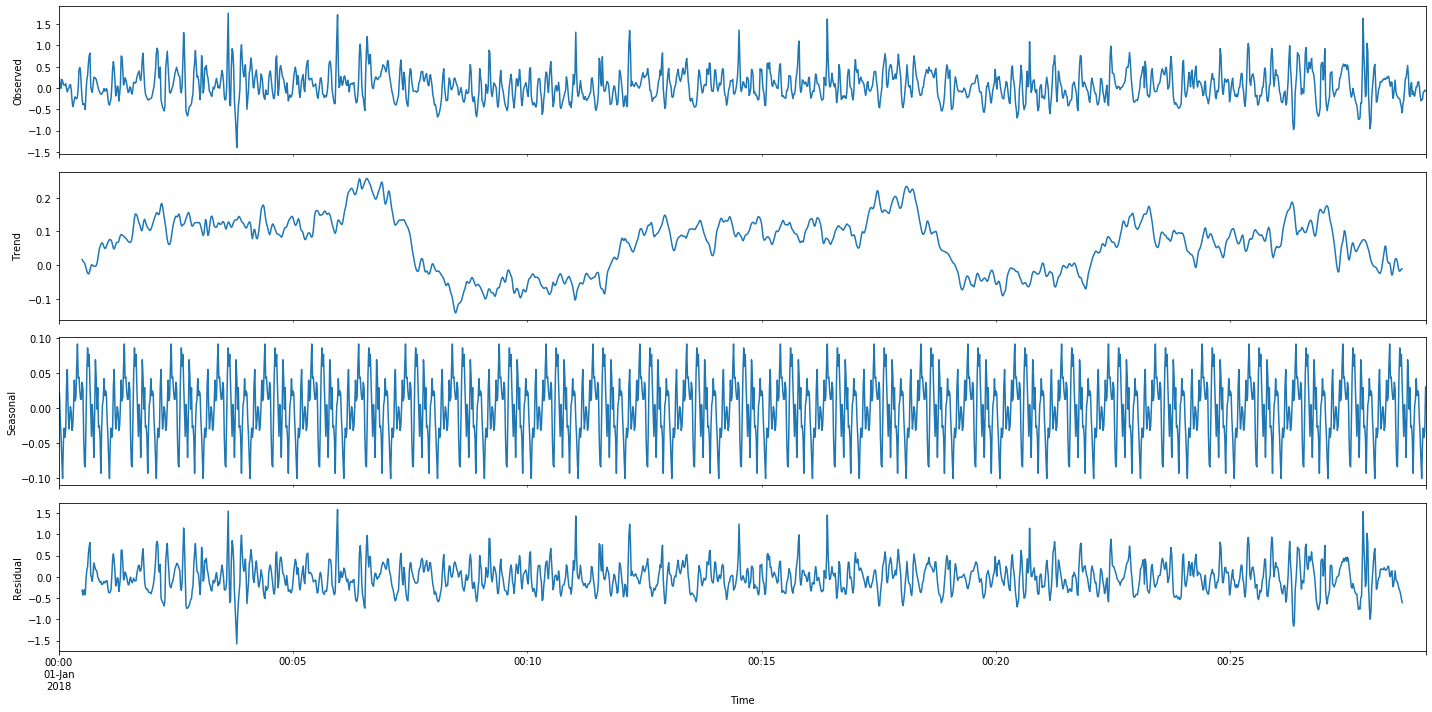

In [11]:
# Your code here:

import statsmodels.api as sm

plt.rcParams["figure.figsize"] = (20,10)


decomposition = sm.tsa.seasonal_decompose(sensor_accelerationx, model = 'additive', freq = 60)
decomposition.plot();

In [12]:
sensor_rotationRatex = sensor['rotationRate.x']

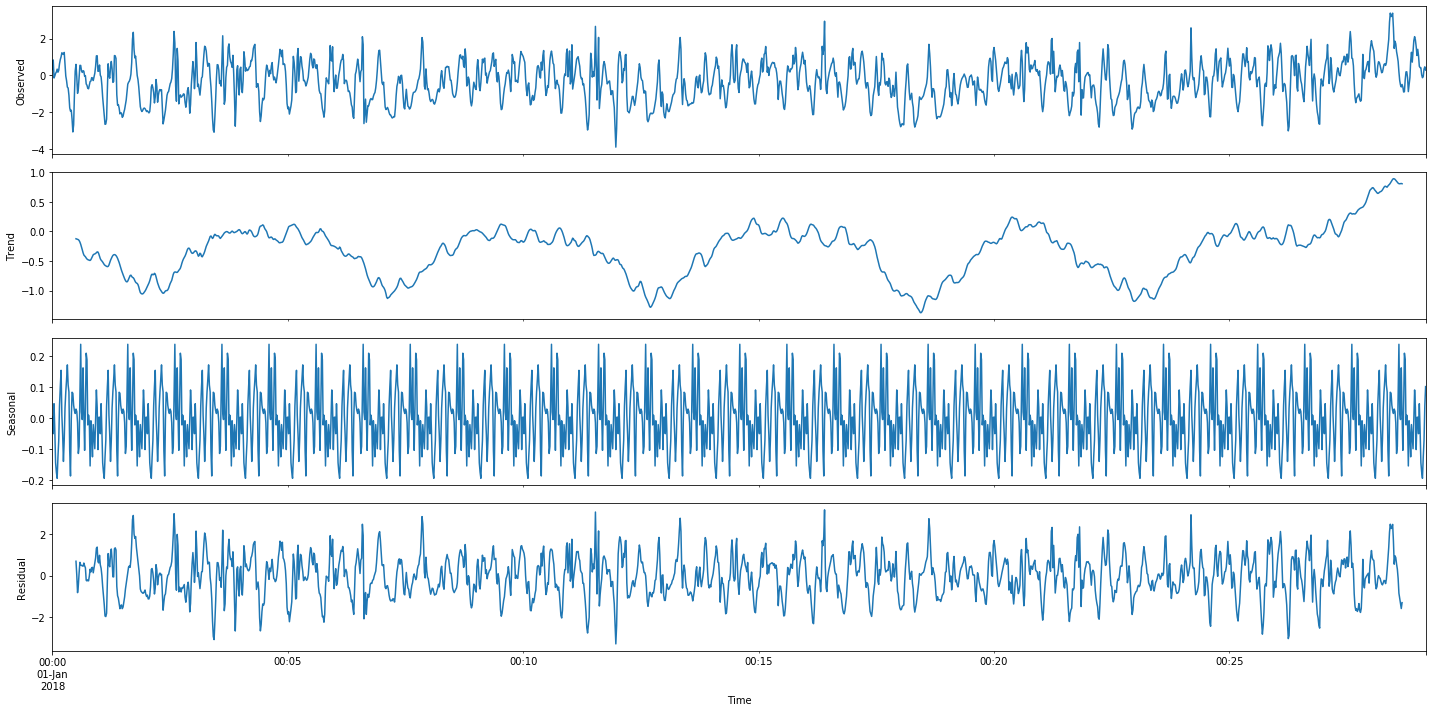

In [13]:
plt.rcParams["figure.figsize"] = (20,10)


decomposition = sm.tsa.seasonal_decompose(sensor_rotationRatex, model = 'additive', freq = 60)
decomposition.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

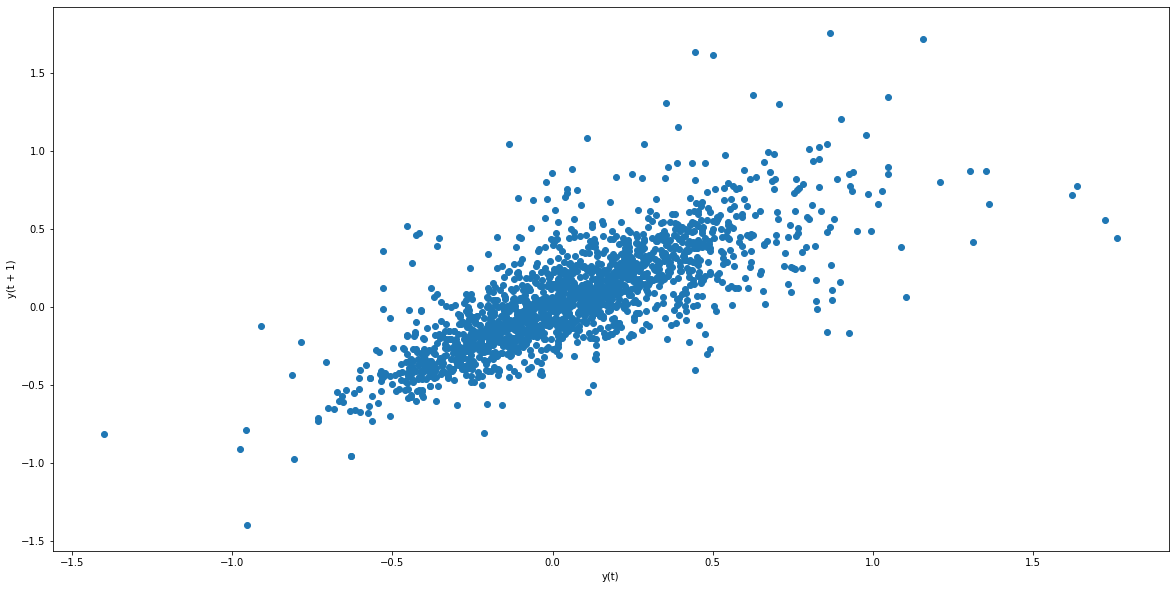

In [14]:
# Your code here:

pd.plotting.lag_plot(sensor_accelerationx)


Create a lag plot for `rotationRate.x`

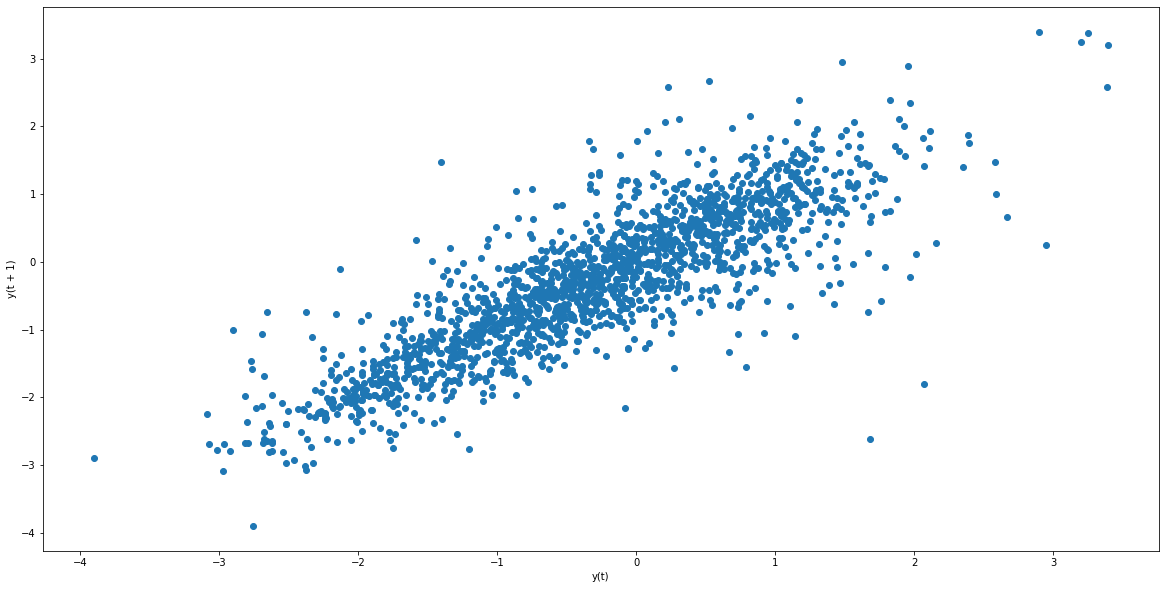

In [15]:
# Your code here:

pd.plotting.lag_plot(sensor_rotationRatex)


What are your conclusions from both visualizations?

In [16]:
# Your conclusions here:

# Que los valores que estamos utilizando no están autocorrelacionados

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [17]:
# Your code here:

from statsmodels.tsa.stattools import adfuller

result = adfuller(sensor_accelerationx, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')



ADF Statistic: -17.95799408616976
p-value: 2.823439483037483e-30


In [18]:
result = adfuller(sensor_rotationRatex, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -5.269860625086411
p-value: 6.3202303359124956e-06


What are your conclusions from this test?

In [19]:
# Your conclusions here:

# Las dos son estacionarias ya que el valor P es superior a 0,05 por lo tanto se rechaza la hipotesis nula de que no sea estacionaria

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [20]:
# Your code here:

import pmdarima as pm

model = pm.auto_arima(sensor_accelerationx, start_p=0, start_q=0,
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
model.summary()


Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 1, 12); AIC=1233.008, BIC=1249.411, Fit time=0.744 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=1232.882, BIC=1243.818, Fit time=0.179 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 12); AIC=-272.021, BIC=-250.149, Fit time=1.825 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 12); AIC=-142.933, BIC=-121.061, Fit time=2.578 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=-271.406, BIC=-255.003, Fit time=0.180 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 0, 12); AIC=-270.025, BIC=-242.685, Fit time=5.694 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 12); AIC=-270.013, BIC=-242.673, Fit time=1.846 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 1, 12); AIC=-268.025, BIC=-235.217, Fit time=7.217 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 0, 12); AIC=1232.947, BIC=1249.351, Fit time=0.895 seconds
Fit ARIMA: order=(2, 0, 0) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1751
Model:               SARIMAX(2, 0, 1)   Log Likelihood                 379.399
Date:                Sat, 31 Aug 2019   AIC                           -748.798
Time:                        13:01:42   BIC                           -721.458
Sample:                             0   HQIC                          -738.692
                               - 1751                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0244      0.006      3.759      0.000       0.012       0.037
ar.L1          0.9888      0.036     27.765      0.000       0.919       1.059
ar.L2         -0.3788      0.032    -11.684      0.000      -0.442      -0.315
ma.L1          0.1821      0.039      4.657      0.000       0.105       0.259
sigma2         0.0379      0.001     46.283      0.000       0.036       0.040
===================================================================================
Ljung-Box (Q):                       54.73   Jarque-Bera (JB):              1812.20
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.35
Prob(H) (two-sided):                  0.63   Kurtosis:                         7.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

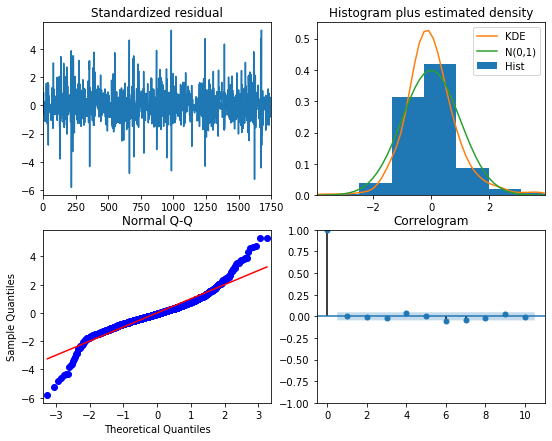

In [22]:
model.plot_diagnostics(figsize=(9,7))
plt.show()

In [23]:
model.predict(n_periods = 24)

array([-0.03504699,  0.01435709,  0.05185799,  0.07022557,  0.07418283,
        0.07113852,  0.06662939,  0.06332388,  0.06176338,  0.06147241,
        0.06177578,  0.06218597,  0.06247666,  0.06260871,  0.06262918,
        0.0625994 ,  0.06256221,  0.0625367 ,  0.06252558,  0.06252423,
        0.06252712,  0.06253049,  0.06253272,  0.06253365])

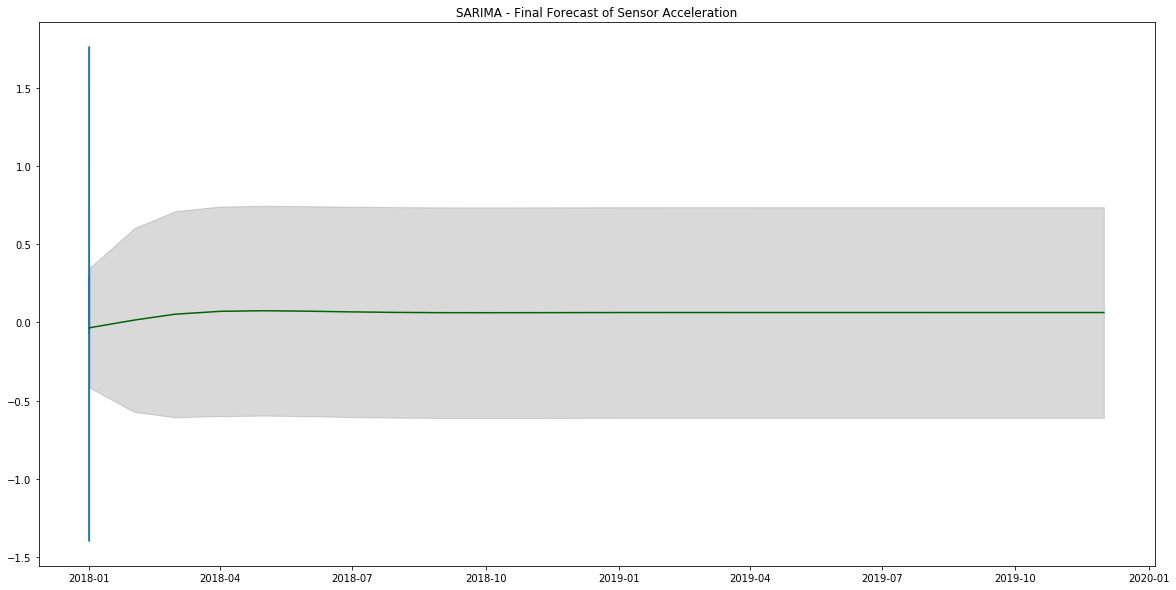

In [24]:
n_periods = 24
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(sensor_accelerationx.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(sensor_accelerationx)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Sensor Acceleration")
plt.show()

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [43]:
sensor_final = sensor_accelerationx[-10:]

sensor_final

Time
2018-01-01 00:29:01    0.149749
2018-01-01 00:29:02    0.038461
2018-01-01 00:29:03   -0.169175
2018-01-01 00:29:04   -0.300361
2018-01-01 00:29:05   -0.270174
2018-01-01 00:29:06   -0.268367
2018-01-01 00:29:07   -0.102444
2018-01-01 00:29:08   -0.085590
2018-01-01 00:29:09   -0.048105
2018-01-01 00:29:10   -0.065011
Name: userAcceleration.x, dtype: float64

In [51]:
modelo = model.predict(n_periods = 10)

modelo

array([-0.03504699,  0.01435709,  0.05185799,  0.07022557,  0.07418283,
        0.07113852,  0.06662939,  0.06332388,  0.06176338,  0.06147241])

In [53]:
# Your code here:

import statsmodels

statsmodels.tools.eval_measures.rmse(modelo, sensonr_final, axis=0)

0.23099706441354298